In [32]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import glob

Description of data:

In summary, the experimental runs were:

- Baseline, eyes open
- Baseline, eyes closed
- Task 1 (open and close left or right fist)
- Task 2 (imagine opening and closing left or right fist)
- Task 3 (open and close both fists or both feet)
- Task 4 (imagine opening and closing both fists or both feet)
- Task 1
- Task 2
- Task 3
- Task 4
- Task 1
- Task 2
- Task 3
- Task 4


Each annotation includes one of three codes (T0, T1, or T2):


- T0 corresponds to rest
- T1 corresponds to onset of motion (real or imagined) of
        the left fist (in runs 3, 4, 7, 8, 11, and 12)
        both fists (in runs 5, 6, 9, 10, 13, and 14)
- T2 corresponds to onset of motion (real or imagined) of
        the right fist (in runs 3, 4, 7, 8, 11, and 12)
        both feet (in runs 5, 6, 9, 10, 13, and 14)


The EEGs were recorded from 64 electrodes as per the international 10-10 system (excluding electrodes Nz, F9, F10, FT9, FT10, A1, A2, TP9, TP10, P9, and P10)

<img width="969" src="https://physionet.org/files/eegmmidb/1.0.0/64_channel_sharbrough.png">

Le choix du meilleur moyen de filtrer dépendra du type de bruit que vous souhaitez éliminer, de vos objectifs d'analyse et des caractéristiques spécifiques de vos données. Voici quelques techniques couramment utilisées pour filtrer les données EEG :

- **Filtre passe-bas :** Un filtre passe-bas permet de supprimer les fréquences supérieures à une certaine valeur. Cela peut être utile pour éliminer le bruit haute fréquence.
- **Filtre passe-haut :** Un filtre passe-haut élimine les fréquences basses. Cela peut être utilisé pour enlever les dérives lentes ou les interférences à basse fréquence.
- **Filtre réjecteur de bande (notch) :** Ce type de filtre élimine une fréquence spécifique et ses harmoniques. Il est utilisé pour supprimer les interférences provenant de sources extérieures, comme le bruit secteur (50 Hz ou 60 Hz).
- **Filtrage spatial :** L'analyse de composantes indépendantes (ICA) peut être utilisée pour extraire des sources indépendantes des signaux EEG, aidant à séparer les sources de bruit des sources cérébrales.

In [6]:
files = glob.glob('../files/S001/*.edf')

In [7]:
len(files)

14

In [8]:
'''
=========  ===================================
run        task
=========  ===================================
1          Baseline, eyes open
2          Baseline, eyes closed
3, 7, 11   Motor execution: left vs right hand
4, 8, 12   Motor imagery: left vs right hand
5, 9, 13   Motor execution: hands vs feet
6, 10, 14  Motor imagery: hands vs feet
=========  ===================================
'''
raws = []

for i in [5, 9, 13]:
    current_file = files[i]
    r = read_raw_edf(current_file, preload=True, stim_channel='auto')
    events, _ = mne.events_from_annotations(r)
    if i in [5, 9, 13]:
        new_labels_events = {1:'rest', 2:'action_hand', 3:'action_feet'} # action
    new_annot = mne.annotations_from_events(events=events, event_desc=new_labels_events, sfreq=r.info['sfreq'], orig_time=r.info['meas_date'])
    r.set_annotations(new_annot)
    raws.append(r)
    
raw_obj = concatenate_raws(raws)

Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


In [9]:
raw_obj.ch_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

In [10]:
original_raw = raw_obj.copy()

In [11]:
events, event_dict = mne.events_from_annotations(original_raw)
print(original_raw.info)
print(event_dict)

Used Annotations descriptions: ['action_feet', 'action_hand', 'rest']
<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>
{'action_feet': 1, 'action_hand': 2, 'rest': 3}


In [12]:
picks = mne.pick_types(original_raw.info, meg=True, eeg=True, stim=False, eog=False, exclude='bads')

In [13]:
eegbci.standardize(original_raw)
montage = mne.channels.make_standard_montage('standard_1005')
original_raw.set_montage(montage)

<RawEDF | S001R03.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

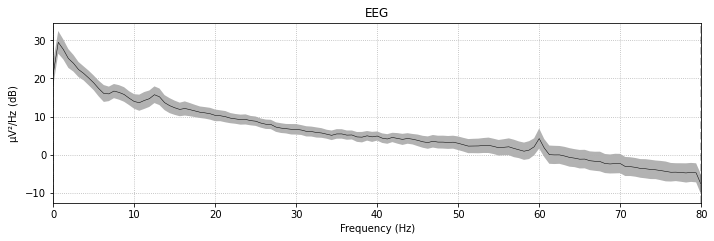

In [14]:
# PSD => Power Spectral Density
original_raw.compute_psd().plot(average=True)
;

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

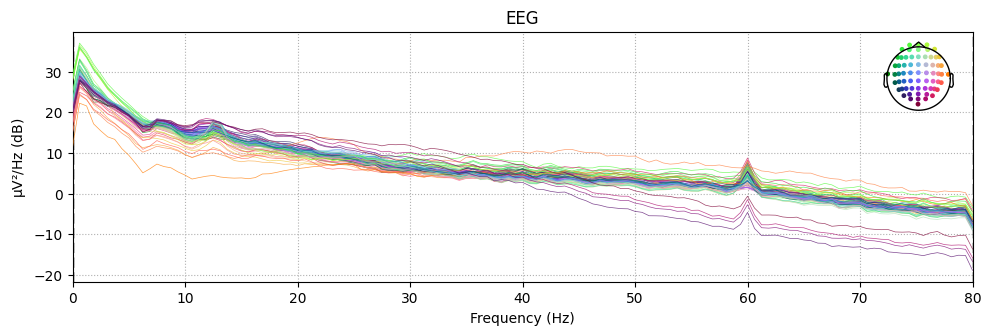

In [15]:
original_raw.compute_psd().plot()
;

## Notch filter

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 sec)

Effective window size : 1.600 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

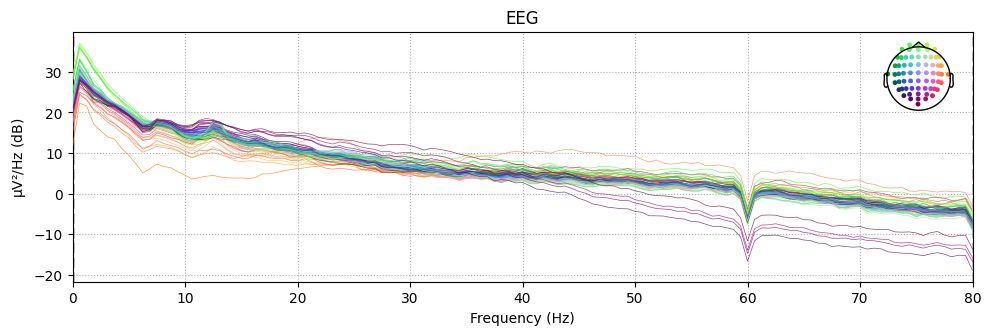

In [16]:
# Notch filter
notch_freq = 60
original_raw.notch_filter(notch_freq, fir_design='firwin')
original_raw.compute_psd().plot()
;

## Band-pass filter keep only alpha and beta waves

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

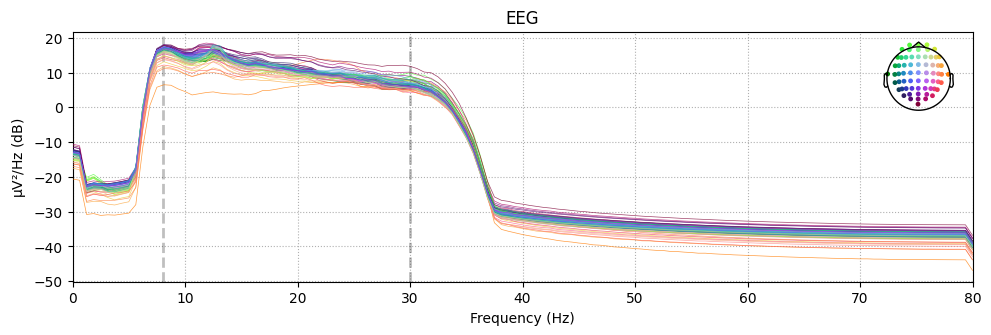

In [17]:
# Band-pass filter keep only alpha and beta waves
low_cutoff = 8
high_cutoff = 30
original_raw.filter(low_cutoff, high_cutoff, fir_design='firwin')
original_raw.compute_psd().plot()
;

## High-pass filter

Filtering raw data in 3 contiguous segments
Setting up low-pass filter at 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 2.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

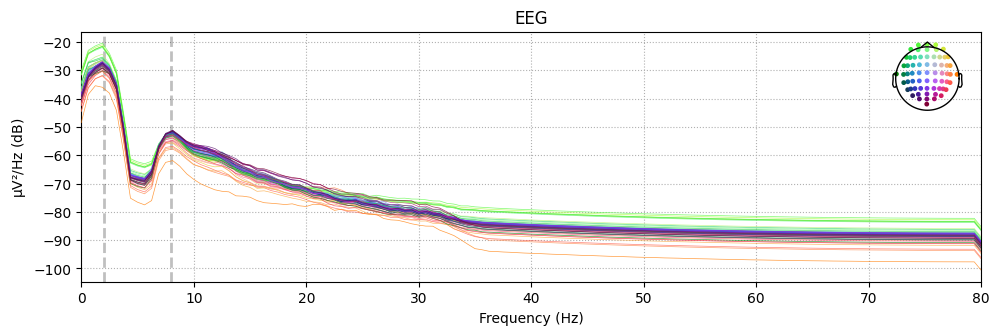

In [18]:
low_cutoff = 2
original_raw.filter(None, low_cutoff, fir_design='firwin')
original_raw.compute_psd().plot()
;

## Low-pass filter

Filtering raw data in 3 contiguous segments
Setting up low-pass filter at 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 61 samples (0.381 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

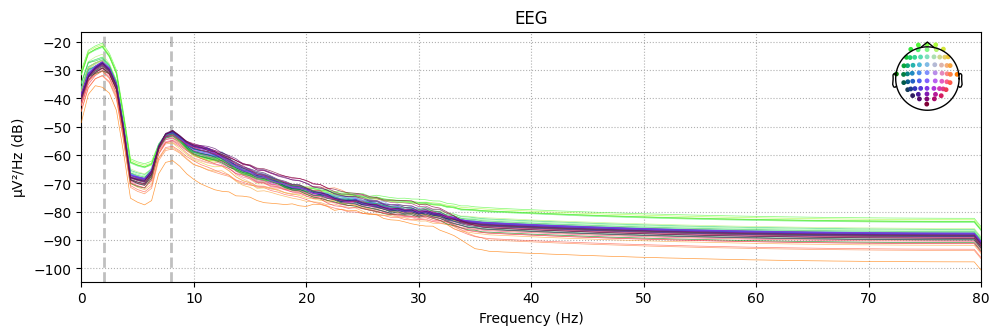

In [19]:
low_cutoff = 35
original_raw.filter(None, low_cutoff, fir_design='firwin')
original_raw.compute_psd().plot()
;

## Final result with basic filters

Effective window size : 1.600 (s)


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

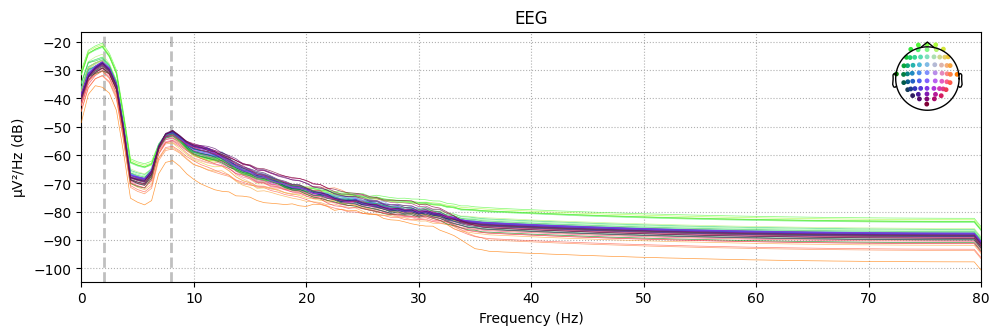

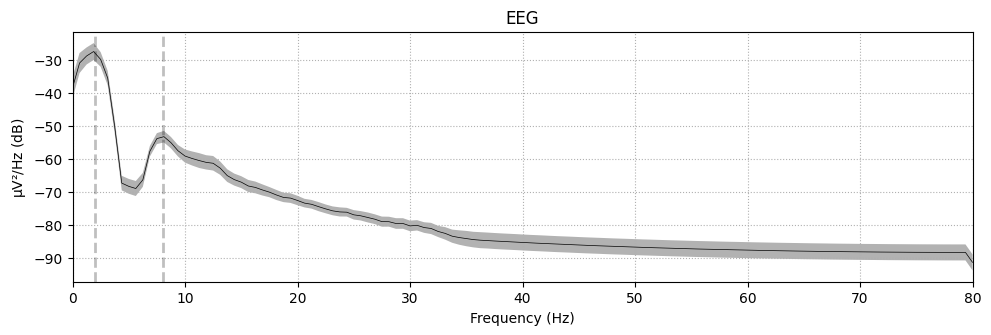

In [20]:
original_raw.compute_psd().plot()
original_raw.compute_psd().plot(average=True)
;

# ICA filtering


L'ICA, ou l'Analyse en Composantes Indépendantes, est une technique d'analyse statistique qui vise à extraire des signaux sources indépendants à partir d'un mélange linéaire de ces signaux. Cela signifie que **l'ICA tente de séparer un ensemble de signaux mélangés en autant de sources indépendantes que possible**, sans aucune connaissance préalable sur ces sources.

L'analyse en composantes indépendantes (ICA) peut être utilisée afin d'extraire des sources indépendantes des signaux EEG, aidant à séparer **les sources de bruit des sources cérébrales**.

L'ICA trouve des applications dans divers domaines, notamment le traitement de signal, la reconnaissance de motifs, la vision par ordinateur et les neurosciences.

Par exemple, dans le traitement de signal, l'ICA peut être utilisée pour séparer les sources audio dans un enregistrement sonore où plusieurs sources sonores sont mélangées. En neurosciences, l'ICA peut être utilisée pour séparer l'activité cérébrale en différentes sources associées à différents processus cérébraux.

Le processus de l'ICA peut être résumé en quelques étapes clés:

L'ICA suppose que les signaux sources d'origine sont **statistiquement indépendants et tente de les récupérer en utilisant cette propriété**. L'objectif est de trouver une matrice de transformation qui, lorsqu'elle est appliquée aux signaux mélangés, **les sépare en signaux indépendants**.

L'objectif est de trouver une matrice de démélange qui, lorsqu'elle est multipliée par les signaux mixtes, produit des signaux démélangés approximativement indépendants. Cette matrice peut être obtenue en maximisant une mesure de *non-gaussianité(1)* ou d'indépendance, telle que la négentropie.

L'optimisation est utilisée pour ajuster les paramètres de la matrice de démélange afin de maximiser la propriété d'indépendance.

Une fois que les composantes indépendantes sont estimées, elles peuvent être évaluées et interprétées.

#### non-gaussianité(1)

Le principe de "non-gaussianité" se repose sur l'idée que les signaux naturels, souvent présents dans notre environnement, ne suivent pas une distribution gaussienne (ou normale). Au contraire, ils présentent souvent des propriétés statistiques distinctes qui peuvent être exploitées pour séparer les composantes indépendantes.

**La distribution gaussienne**:

Dans cette distribution, la majorité des valeurs se concentrent autour de la moyenne, formant une courbe en forme de cloche.

<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/0/01/Gauss_reduite.svg" width="400px">
</div>

**Les distributions non gaussiennes**:

Les distributions non gaussiennes diffèrent de la distribution gaussienne par leur forme et leurs propriétés statistiques. Elles peuvent être asymétriques, avoir des queues plus épaisses, ou présenter des structures différentes de la cloche caractéristique de la distribution gaussienne.

Diverses mesures de non-gaussianité, telles que l'entropie, l'asymétrie, la kurtosis, etc., sont utilisées pour quantifier le degré de non-gaussianité d'un signal. Ces mesures sont intégrées dans l'objectif d'optimisation de l'ICA.


In [21]:
from mne.preprocessing import ICA

In [22]:
n_components = 20
ica = ICA(n_components=n_components, random_state=97, max_iter=800)

In [23]:
# tmp_raw = original_raw.copy()
ica.fit(original_raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


Selecting by number: 20 components
Fitting ICA took 3.6s.


Method,fastica
Fit,92 iterations on raw data (60000 samples)
ICA components,20
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


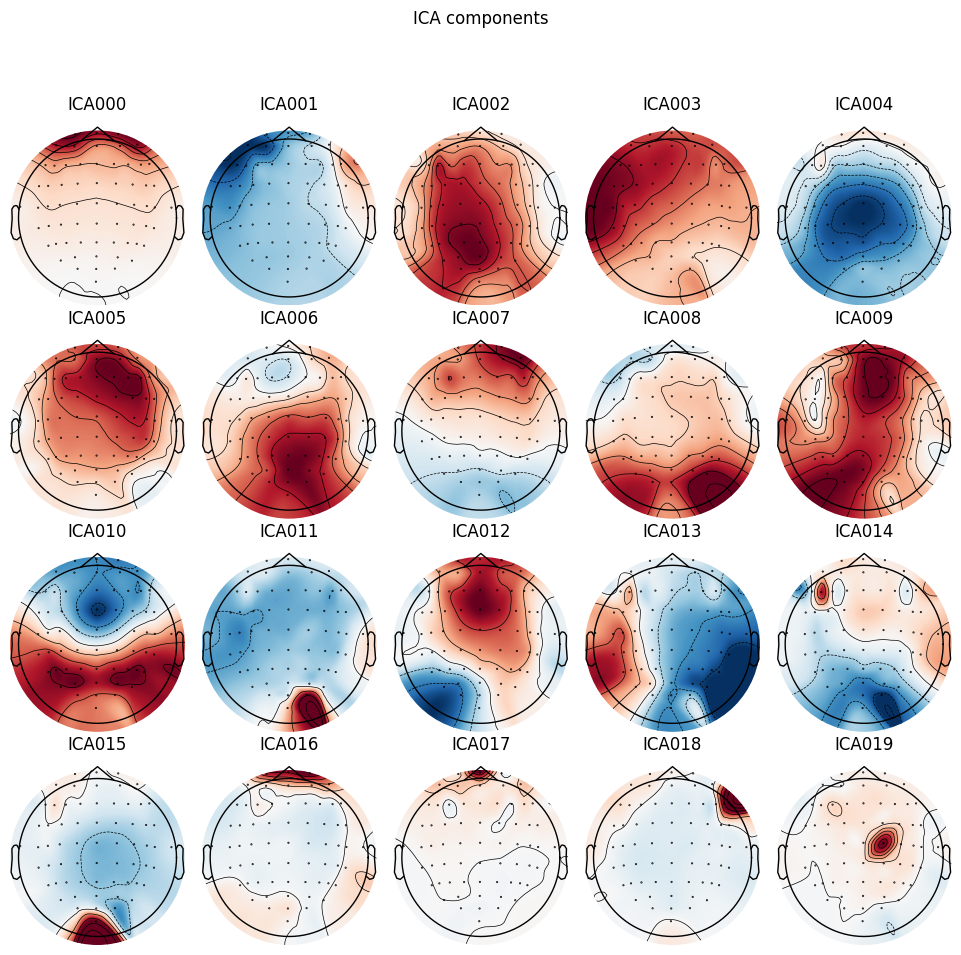

''

In [24]:
ica.plot_components()
;

In [25]:
components_to_excludes, scores = ica.find_bads_eog(original_raw, ch_name='Fpz')

Using EOG channel: Fpz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [26]:
# apply ICA with components to exclude
ica.exclude = components_to_excludes
ica.apply(original_raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 64 PCA components


<RawEDF | S001R03.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>

## Before / after filtering

Using matplotlib as 2D backend.


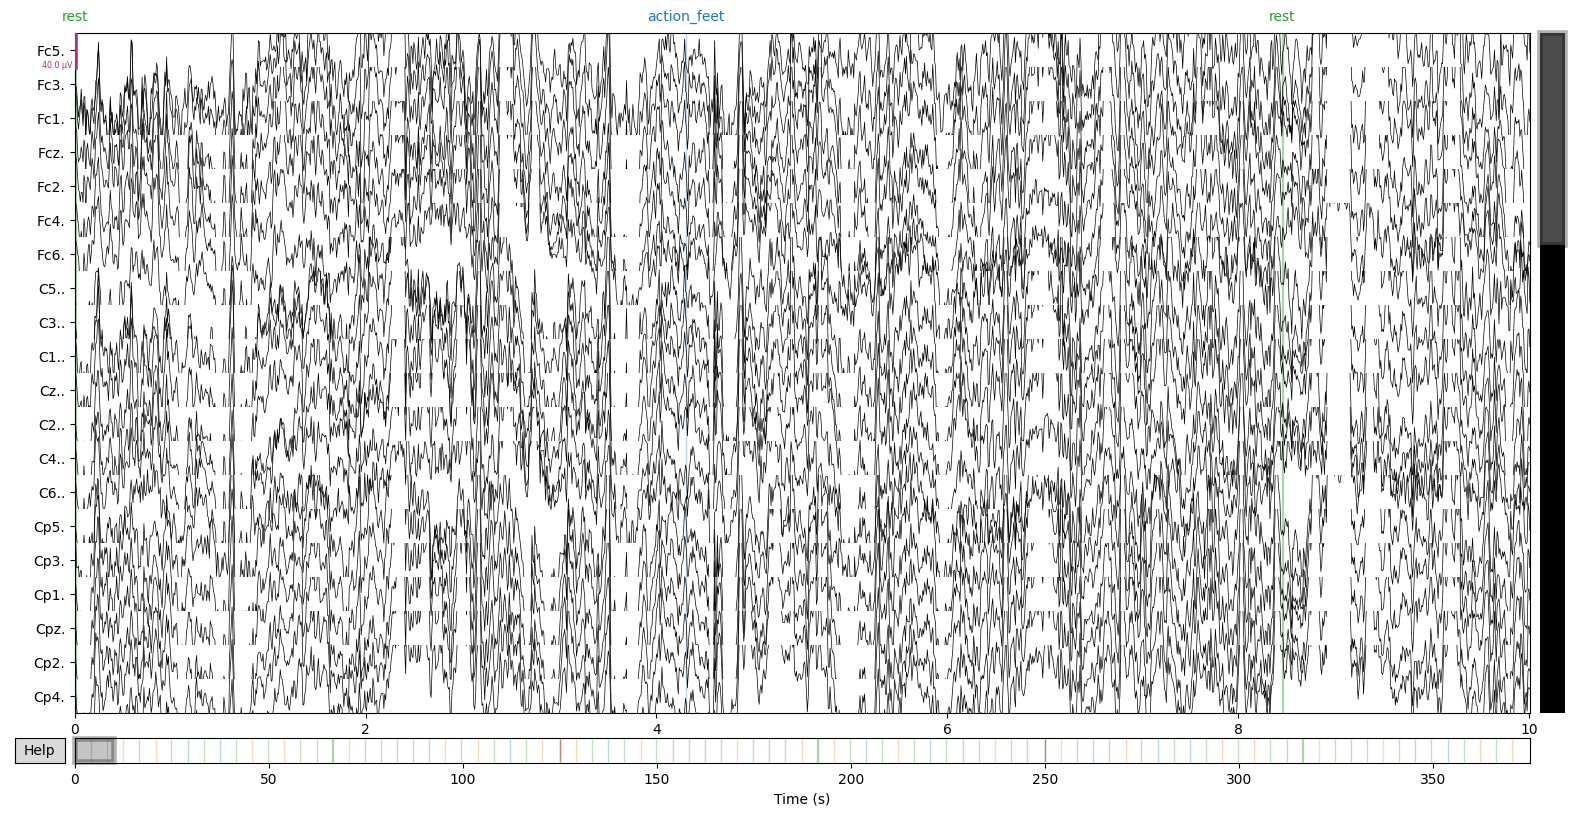

''

In [27]:
raw_obj.plot()
;

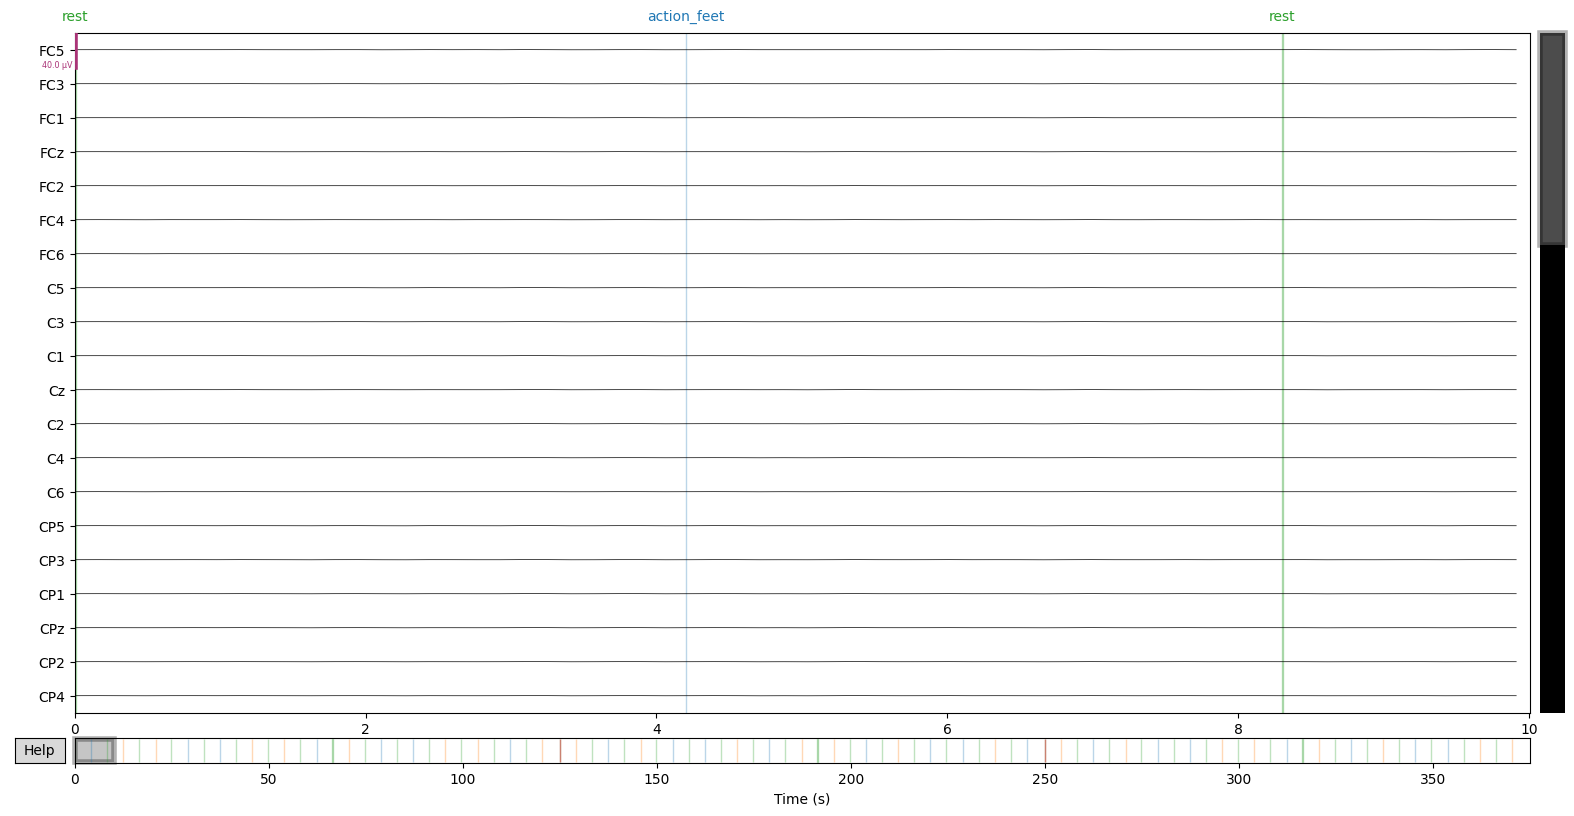

''

In [28]:
original_raw.plot()
;

Creating RawArray with float64 data, n_channels=20, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   374.994 secs
Ready.


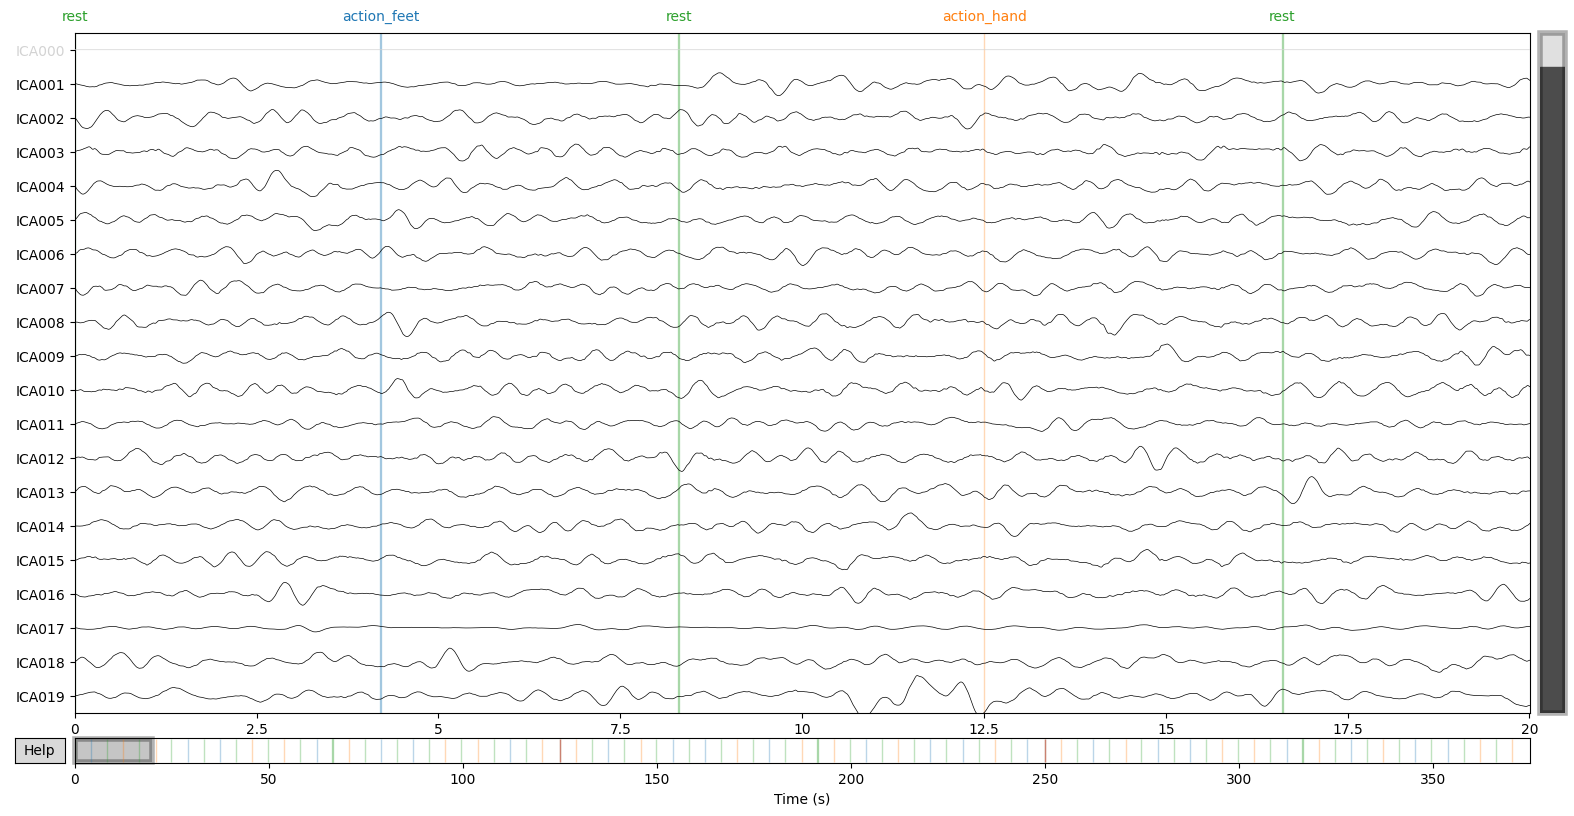

''

In [29]:
ica.plot_sources(original_raw)
;

Effective window size : 1.600 (s)


/var/folders/s9/mx70pkk11bq2wl2cnrt6nfwc0000gn/T/ipykernel_30846/3447003555.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_obj.compute_psd().plot()
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

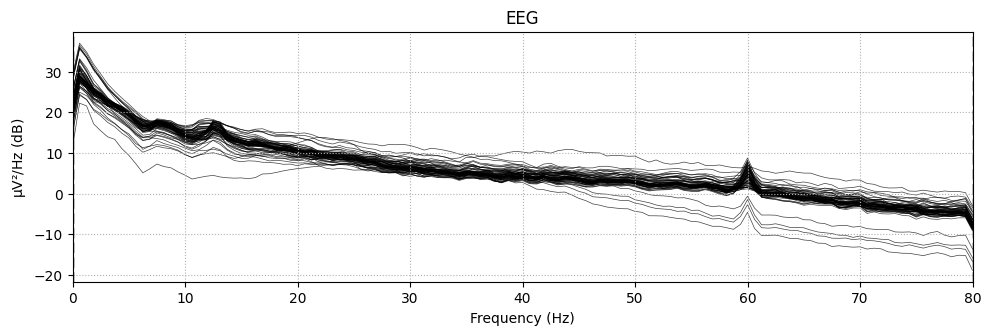

In [30]:
raw_obj.compute_psd().plot()
;

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


''

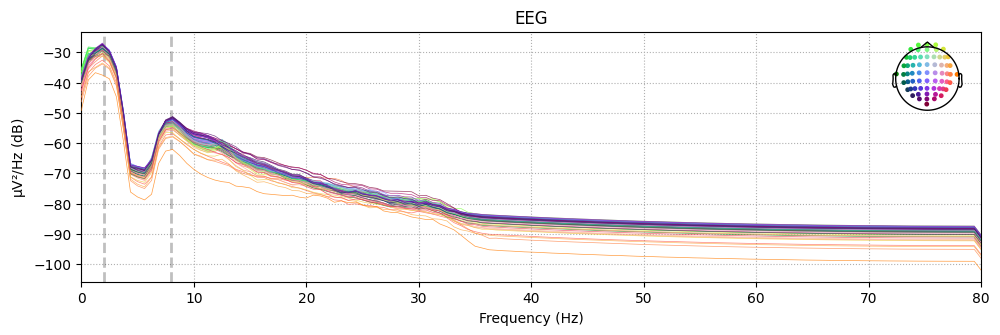

In [31]:
original_raw.compute_psd().plot()
;